### Brief tutorial on linear regression with Python

This notebook is a brief tutorial on the implementation of linear regression with Python. \
Topics covered:

- read to a Pandas data frame a dataset stored in the local drive file as comma separated value (csv) format.

- read to a Numpy arrays a dataset stored in the local drive file as comma separated value (csv) format.

- display the values in the dataset

- plot a chart representing the dataset

- Use some markdown math notation

- implementation of linear regression: \
  i) translate math expressions to plain Python \
  ii) translate math expressions in vector form to Python and Numpy 

---

Markdown math symbols:

https://www.upyesp.org/posts/makrdown-vscode-math-notation/

---

First we need to import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset can be read into a Pandas DataFrame or a NumPy array. Below is shown how to do it both ways. However, throughout the notebook, only NumPy arrays are used.

Load the data set in the companion **demodataset.csv** file with pandas:

In [2]:
df = pd.read_csv("demodataset.csv", header=None) # Do not assume first row as column labels

Load the data set in the companion **demodataset.csv** file with numpy:

In [3]:
data = np.loadtxt("demodataset.csv", delimiter=",")

We can use Python **print()** function to display the dataset values

In [4]:
print('m = {0:d}\n'.format(len(data)))
print(data)

m = 100

[[-8.78000e-01 -3.22080e+01]
 [ 1.36000e+00  4.91780e+01]
 [ 1.64000e+00  6.33840e+01]
 [ 5.42000e-01  5.09550e+01]
 [ 8.25000e-01  7.64030e+01]
 [-5.96000e-01 -9.07150e+01]
 [-5.60000e-02  3.02390e+01]
 [-1.32000e-01 -2.97050e+01]
 [-2.43500e+00 -1.39298e+02]
 [-4.04000e-01 -1.04830e+01]
 [ 3.82000e-01  3.48500e+01]
 [ 1.36700e+00  1.03150e+02]
 [-7.48000e-01 -2.55260e+01]
 [-3.82000e-01  7.50600e+00]
 [ 8.42000e-01  5.22440e+01]
 [-7.70000e-02  7.08100e+00]
 [ 4.33000e-01  7.63250e+01]
 [-2.17000e-01 -5.21700e+01]
 [ 1.46800e+00  7.16200e+01]
 [ 1.13000e-01 -2.39000e-01]
 [ 1.73100e+00  1.73630e+01]
 [-3.36000e-01 -1.94300e+01]
 [-1.09900e+00 -3.97120e+01]
 [-8.42000e-01 -7.12000e+01]
 [ 5.66000e-01  2.59360e+01]
 [-1.05800e+00 -6.51850e+01]
 [ 6.95000e-01  7.98900e+00]
 [ 5.39000e-01  2.55390e+01]
 [ 5.02000e-01  5.53640e+01]
 [-1.43900e+00 -8.34900e+01]
 [-1.89000e-01 -2.15500e+00]
 [-7.40000e-02  4.71100e+00]
 [-1.79300e+00 -1.99260e+01]
 [ 2.23100e+00  1.05280e+02]
 [ 4.

---
Or we can also let Jupyter format the output. Just write the identifier of the variable to display it in the last line of the cell

In [5]:
data

array([[-8.78000e-01, -3.22080e+01],
       [ 1.36000e+00,  4.91780e+01],
       [ 1.64000e+00,  6.33840e+01],
       [ 5.42000e-01,  5.09550e+01],
       [ 8.25000e-01,  7.64030e+01],
       [-5.96000e-01, -9.07150e+01],
       [-5.60000e-02,  3.02390e+01],
       [-1.32000e-01, -2.97050e+01],
       [-2.43500e+00, -1.39298e+02],
       [-4.04000e-01, -1.04830e+01],
       [ 3.82000e-01,  3.48500e+01],
       [ 1.36700e+00,  1.03150e+02],
       [-7.48000e-01, -2.55260e+01],
       [-3.82000e-01,  7.50600e+00],
       [ 8.42000e-01,  5.22440e+01],
       [-7.70000e-02,  7.08100e+00],
       [ 4.33000e-01,  7.63250e+01],
       [-2.17000e-01, -5.21700e+01],
       [ 1.46800e+00,  7.16200e+01],
       [ 1.13000e-01, -2.39000e-01],
       [ 1.73100e+00,  1.73630e+01],
       [-3.36000e-01, -1.94300e+01],
       [-1.09900e+00, -3.97120e+01],
       [-8.42000e-01, -7.12000e+01],
       [ 5.66000e-01,  2.59360e+01],
       [-1.05800e+00, -6.51850e+01],
       [ 6.95000e-01,  7.98900e+00],
 

---
Extract the first column in the data set to vector **x** and the second column to vector **y**.   
   
   
Plot a figure showing the data set as:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{(x<sup>(i)</sup>,y<sup>(i)</sup>) | i=1,…, m }


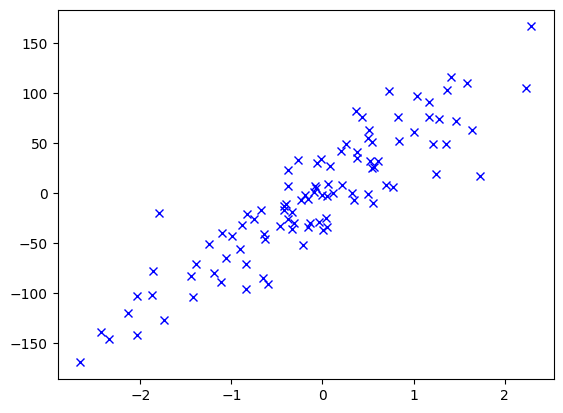

In [6]:
x=data[:,0] # x is the first  column in the data set
y=data[:,1] # y is the second column in the data set

plt.plot(x, y, "x", color = "blue")
plt.show()

---
Math expressions can be translated to plain Python code, however Python is an interpreted language, which means that it is much slower than compiled languages like C/C++, Cuda, Rust, etc. 

Thought when working with small datasets with tens or hundreds of data points, the algorithms implemented with plain Python run in a flash, for datasets with millions of data points, plain Python would take ages. 

For this, Python has several frameworks implemented over compiled languages like Numpy, Keras, Tensorflow, PyTorch, that are optimized to run very fast on multicore CPUs, GPUs and TPUs.

Below it is shown how to compute linear regression parameters, $\theta_0^*$ and $\theta_1^*$, from scratch:

$$
\begin{split}
\theta_0 &= \bar y - \theta_1 \bar x\\
\\
\theta_1 &= \frac {SS_{xy}}{SS_{xx}}=
\frac
{ \sum_{i=1}^{m} \left[\left(x_i - \bar {x}\right) \left(y_i - \bar {y}\right) \right]}
{ \sum_{i=1}^{m} \left( x_i - \bar x \right)^2 }
\end{split}
$$

with:
- plain Python 
- rewrite the expression in vector notation and implement it with Python + Numpy.

---
With plain Python, the sum and means can be implemented with **for** loops:

In [11]:
# Returns theta0 and theta1 linear regression parameters
#
# h0(x) = Θ0 + Θ1*x
#
# PRE x.shape == y.shape
#
def linearRegressionv1(x, y):

    m = len(x)
    
    meanX = 0
    for i in range(m): 
        meanX += x[i]
    meanX /= m

    meanY = 0
    for i in range(m): 
        meanY += y[i]
    meanY /= m

    #         m
    #        ∑  (x(i) - x̄) * (y(i) - ȳ)  
    # Θ1 =  -----------------------------
    #            m
    #           ∑  (x(i) - x̄) ** 2
    num = 0
    den = 0
    for i in range(m): 
        num += (x[i] - meanX) * (y[i] - meanY)
        den += (x[i] - meanX) ** 2
        
    theta1 = num / den      

    # Linear regression 1 independent variable:
    #        y = Θ0 + Θ1*x
    #
    # hypotesis:
    #    h0(x) = Θ0 + Θ1*x
    #
    #       Θ0 = ȳ - Θ1 * x̄
    theta0 = meanY - theta1 * meanX
    
    return theta0, theta1

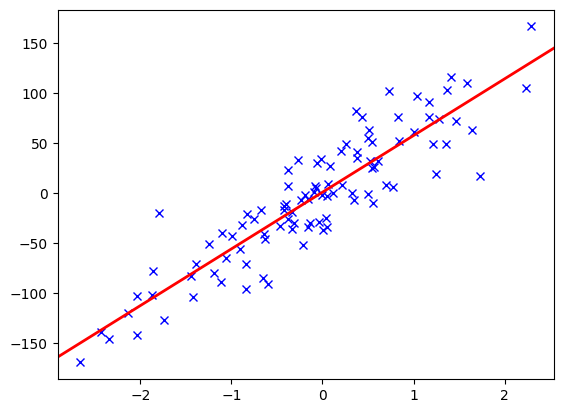

Θ0 (intercept) = 0.802
Θ1 (slope)     = 56.758


In [13]:
#Compute parameters
theta0, theta1 = linearRegressionv1(x, y)

plt.plot(x, y, "x", color = "blue")
plt.axline((0, theta0), slope=theta1, color="red", linewidth=2, label=f"y = {theta1}x + {theta0}")
plt.show()

print('Θ0 (intercept) = {:.3f}'.format(theta0))
print('Θ1 (slope)     = {:.3f}'.format(theta1))

---
Considering vectors $\mathbf a$ and $\mathbf b$, both with $n$ elements:

$\qquad \mathbf{a} = \begin{bmatrix}
a_0 \\ a_1 \\ \dots \\ a_{n-1}
\end{bmatrix}
\quad\quad
\mathbf{b} = \begin{bmatrix}
b_0 \\ b_1 \\ \dots \\ b_{n-1}
\end{bmatrix}$

The dot product of both vectors can be computed with:

$\sum_{i=1}^{m} a_i * b_i$

which can be expressed in vector notation as:

$\mathbf a^T \mathbf b$

This way, we can rewrite the expression for $\theta_1$ in vector notation as shown below (note that vector variables are in **bold**):

$$\begin{split}
\theta_1 = \frac {SS_{xy}}{SS_{xx}}
&= \frac
{ \sum_{i=1}^{m} \left[\left(x_i - \bar {x}\right) \left(y_i - \bar {y}\right) \right]}
{ \sum_{i=1}^{m} \left( x_i - \bar x \right)^2 } \\
\\
&= \frac 
{ \left( \mathbf{x} - \bar{x} \right)^T \left( \mathbf{y} - \bar{y} \right)}
{ \left( \mathbf{x} - \bar{x} \right)^T \left( \mathbf{x} - \bar{x} \right) }
\end{split}$$


When there is an operation where at least one of the operands is a vector or a matrix, even if the other is a scalar, use optimized **Numpy** functions like: 
- np.add(x,y)
- np.multiply(x,y) \
$\dots$

To compute the dot procuct of 2 vectors, a vector and a matrix or matrices use:
- np.dot(a,b)

In [14]:
# Returns theta0 and theta1 linear regression parameters
#
# h0(x) = Θ0 + Θ1*x
#
# PRE x.shape == y.shape
#
def linearRegressionv2(x, y):
    meanX = np.mean(x)
    meanY = np.mean(y)

    #         m                                        T        
    #        ∑  (x(i) - x̄) * (y(i) - ȳ)     ( x - x̄ ) . ( y - ȳ )
    # Θ1 =  ----------------------------- = -------------------------
    #            m                                     T
    #           ∑  (x(i) - x̄) ** 2          ( x - x̄ ) . ( x - x̄ )
    
    m = len(x)   
    xs = np.subtract(x, meanX)
    ys = np.subtract(y, meanY)
    num = np.dot(xs, ys)
    den = np.dot(xs, xs)
        
    theta1 = num / den      

    # Linear regression 1 independent variable:
    #        y = Θ0 + Θ1*x
    #
    # hypotesis:
    #    h0(x) = Θ0 + Θ1*x
    #
    #       Θ0 = ȳ - Θ1 * x̄
    theta0 = meanY - theta1 * meanX
    
    return theta0, theta1

In [10]:
#Compute parameters
theta0, theta1 = linearRegressionv2(x, y)
print('Θ0 (intercept) = {:.3f}'.format(theta0))
print('Θ1 (slope)     = {:.3f}'.format(theta1))

Θ0 (intercept) = 0.802
Θ1 (slope)     = 56.758


---
Note that $\theta_0$ and $\theta_1$ are the elements of vector $\boldsymbol{\theta}$ for single linear regression.

For multivariate regression $\boldsymbol{\theta}$ have $n$ parameters, where $n \ge 2 $.